# Bag of  words（BoW)

本章では、テキストを形態素解析に適用したあと、どのように分析につなげていくかを説明します。基本は、テキストごとにトークンの出現回数をデータとすることになります。


## 頻度データの作成

テキストマイニングでは、テキストをデータサイエンスや機械学習で一般的な手法を使って分析します。データ分析の手法の多くは、データが数値であることを想定しています。


In [1]:
from collections import Counter
cnt = Counter(['あ', 'あ', 'い', 'う', 'う', 'う','え', 'え', 'お'])
print(cnt)

Counter({'う': 3, 'あ': 2, 'え': 2, 'い': 1, 'お': 1})


上の簡単な例では、文字と1つ1つ登録したリストを `Counter()` に渡しています。

なお、１行目の  `import my_mecab as my_tokenizer` を `import my_janome as my_tokenizer` と変えると、形態素解析として Janome  が使われます。 


In [2]:
## まず文章を形態素解析にかける
## import my_janome as my_tokenizer
import my_mecab as my_tokenizer
words_freq = my_tokenizer.tokens('太郎をねむらせ、太郎の屋根に雪ふりつむ。 次郎をねむらせ、次郎の屋根に雪ふりつむ。', pos=[])
print(words_freq)

['太郎', 'を', 'ねむらせる', '、', '太郎', 'の', '屋根', 'に', '雪', 'ふり', 'つむ', '。', '次郎', 'を', 'ねむらせる', '、', '次郎', 'の', '屋根', 'に', '雪', 'ふり', 'つむ', '。']


In [3]:
cnt = Counter(words_freq)
print(cnt)

Counter({'太郎': 2, 'を': 2, 'ねむらせる': 2, '、': 2, 'の': 2, '屋根': 2, 'に': 2, '雪': 2, 'ふり': 2, 'つむ': 2, '。': 2, '次郎': 2})



入力した文章は **三好達治** という詩人の「雪」という作品ですが、この詩では意図的に同じ単語が繰り返されています

## ファイル集合の解析

ここでは、対象となるテキストをファイルから読み込み、これらに形態素解析を適用します。さらに、抽出した形態素の頻度情報から **WordCloud** というグラフィックスを作成する方法を説明します。
 

In [4]:
from AozoraDL import aozora
aozora('https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip')

Download URL
URL: https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip
43754_ruby_17594/chumonno_oi_ryoriten.txt
ファイルの作成：chumonno_oi_ryoriten.txt


あるいは、コマンドプロンプトないしターミナルで以下のように実行することもできます。


> python AozoraDL.py https://www.aozora.gr.jp/cards/000081/files/43754_ruby_17594.zip


関数 `aozora()`に引数として指定した URL は青空文庫を作品を単独ファイルとしてダウンロードする場合の URL です。各作品の説明ページの最後にリンクがありますので、右クリックなどで URL をコピーしておきます。


In [5]:
# import os
# print(os.getcwd())
with open('chumonno_oi_ryoriten.txt', encoding='utf-8') as f:
    data = f.read()

res = my_tokenizer.tokens(data)
print('最初の10語を確認')
print(res[:10])

最初の10語を確認
['二', '人', '若い', '紳士', 'イギリス', '兵隊', 'かたち', 'する', 'する', '鉄砲']


この結果を可視化してみます。
以下、簡単な例を実行してみましょう。
その前に join 関数について理解しておきます。

In [6]:
word_list = ['私は', '蕎麦', 'を', '食べる', 'ます']
print(' '.join(word_list))

私は 蕎麦 を 食べる ます



さらに読み込んだストップワードだけでは不十分なので、「する」「ある」などを `extend()` を使って追加します。





In [7]:
# import urllib.request
# url = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
# urllib.request.urlretrieve(url, 'data/stopwords.txt')
stopwords = []
with open('data/stopwords.txt', 'r', encoding='utf-8') as f:
	stopwords = [w.strip() for w in f]
stopwords.extend(['する', 'ある', 'いる', 'なる', 'の', 'ん'])

In [8]:
print('もとテキスト「注文の多い料理点」の形態素数')
print(len(res))
## ストップワードを取り除く
res_without_stopwords = [i for i in res if i not in stopwords]
print('削減後の形態素数')
print(len(res_without_stopwords))
print('削除後の形態素リストの一部を確認')
print(res_without_stopwords[:10])

もとテキスト「注文の多い料理点」の形態素数
1289
削減後の形態素数
885
削除後の形態素リストの一部を確認
['若い', '紳士', 'イギリス', '兵隊', '鉄砲', 'かつぐ', '白熊', '犬', '疋', 'つれる']



さて、ワードクラウドを作成しますが、matplotlib はデフォルトでは日本語を表示できません。そこで、日本語が表示されるように日本語フォントを設定します。以下は WindowsとMac, Linux で一般的なフォントを指定しています。なお、wordclound は Anaconda には付属していません。別途 `pip` でインストールしてください。


In [9]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 4.7 MB/s eta 0:00:00 MB/s eta 0:00:01


In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Yu Gothic', 'Meirio', 'HiraginoSerif-W3.ttc', 'Hiragino Maru Gothic Pro', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

(-0.5, 899.5, 499.5, -0.5)

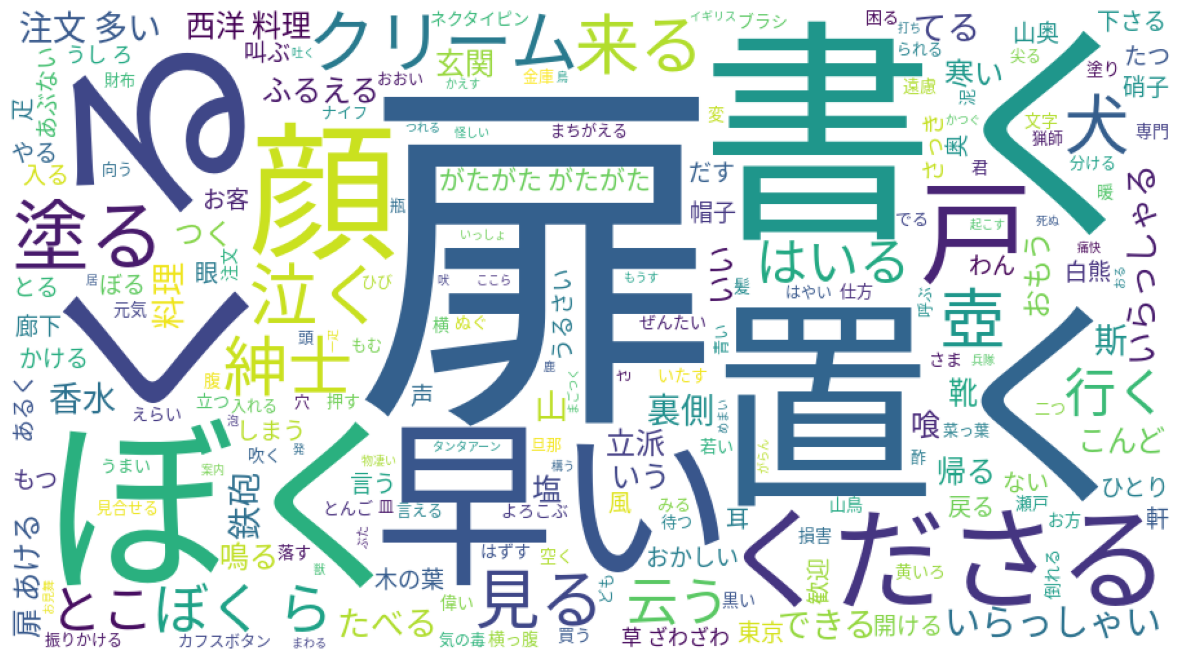

In [11]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
## フォントについては利用環境に合わせて指定
               ## 例えば 'C:\\WINDOWS\\FONTS\\MEIRYO.TTC'    ## メイリオ Windows
               ## '/Library/Fonts/ヒラギノ明朝 ProN W6.ttc' ## ヒラギノ macOS
wordcloud = WordCloud(background_color='white', width=900, height=500, \
                      font_path='NotoSansCJK-Regular.ttc',\
                      stopwords=set(stopwords)).generate(' '.join(res))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')

出現回数の多い形態素ほど、大きく表示されています。

たとえば、名詞だけを抽出した結果を使ってワードクラウドを描くとどうなるでしょうか。実際にやってみましょう。




In [12]:
res = my_tokenizer.tokens(data, pos=['名詞'])
## 指定する品詞が１つであればカギカッコを省いて pos='名詞' でもよい
print(res[:10])

['二', '人', '紳士', 'イギリス', '兵隊', 'かたち', '鉄砲', '白熊', 'よう', '犬']


(-0.5, 899.5, 499.5, -0.5)

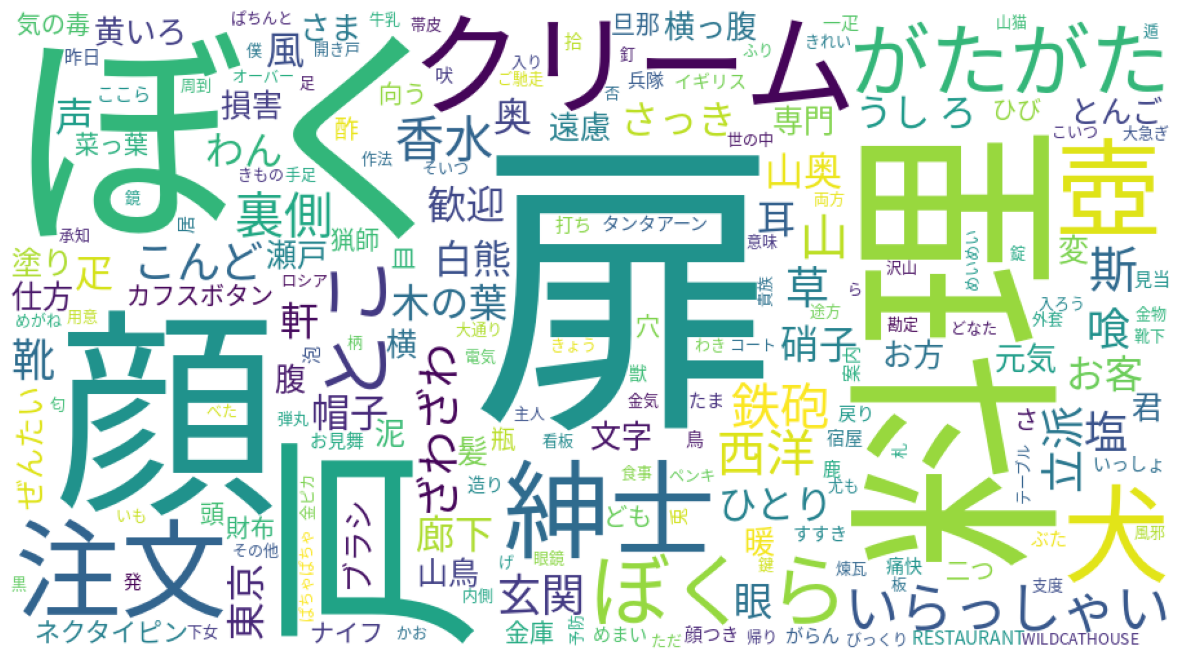

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 以下のフォント指定は筆者の環境(Ubuntu)での例です
wordcloud = WordCloud(background_color='white',width=900, height=500, \
                      font_path = 'NotoSansCJK-Regular.ttc',\
                      stopwords=set(stopwords)).generate(' '.join(res))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')




## 複数の文章を解析する

複数のテキストを別々に形態素解析にかけ、それぞれの結果を1つの表にまとめたいとします。



In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=my_tokenizer.tokens)
## 2つの文章を要素とするリストを用意
texts = ['太郎をねむらせ、太郎の屋根に雪ふりつむ。', ' 次郎をねむらせ、次郎の屋根に雪ふりつむ。']
vectorizer.fit(texts)
bow = vectorizer.transform(texts)

/mnt/2bddf92b-47f9-4809-95a5-b91e7f25af27/myData/GitHub/myPython/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
print(vectorizer.vocabulary_)

{'太郎': 3, 'ねむらせる': 1, '屋根': 4, '雪': 6, 'ふり': 2, 'つむ': 0, '次郎': 5}




ところで、頻度をカウントした結果を、ここでは `bow` として保存していますが、このオブジェクト名を指定して `print()` を実行しても頻度表らしきものは出力されません。



In [16]:
print(bow)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	2
  (1, 6)	1


`CountVectorizer` は辞書と頻度の情報を **粗行列**  (Sparse Matrix) に適した特殊な形式で保存しており、「表」という形式にはなっていないのです。


ここで、先ほど作成した `bow` をもう一度出力させてみましょう。

In [17]:
print(bow)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 4)	1
  (0, 6)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	2
  (1, 6)	1


In [18]:
print(bow.toarray())

[[1 1 1 2 1 0 1]
 [1 1 1 0 1 2 1]]



出力は、それぞれの文章ごとに辞書の単語の出現回数を並べたリストを集めたリストになります（リストが入れ子になっている）。少しわかりやすく書き直すと以下のようになります。

|        | つむ  | ねむらせる    | ふり | 次郎   | 太郎  | 屋根 | 雪 |
|--------|------|------------|------|------|------|------|----|
| 文章１ | 1     | 1          | 1    | 0     | 2    | 1    | 1  |
| 文章２ | 1     | 1          | 1    | 2     | 0    | 1    | 1  |



In [19]:
for word,count in zip(vectorizer.get_feature_names(), bow.toarray()[0, :]):
    print(word, count)

つむ 1
ねむらせる 1
ふり 1
太郎 2
屋根 1
次郎 0
雪 1


/mnt/2bddf92b-47f9-4809-95a5-b91e7f25af27/myData/GitHub/myPython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


文書１と文書２それぞれの形態素頻度を並べて表示するには以下のようにします。`zip()` は指定されたリストから要素をインデックス順に取り出すメソッドです。


In [20]:
for word, count1, count2 in zip(vectorizer.get_feature_names(), bow.toarray()[0, :], bow.toarray()[1, :]):
    print(word, count1, count2)

つむ 1 1
ねむらせる 1 1
ふり 1 1
太郎 2 0
屋根 1 1
次郎 0 2
雪 1 1




## TF-IDF


Pythonの scikit-learn ライブラリでは TF は以下のように計算されています。ここで $w_{i,j}$ は、ある文書 $d_j$ だとします。


    $$tf_{i,j} = \frac{w_{i,j}}{\sum_{i} w_{i,j}}$$



一方、IDF は Inverse Document Frequency の略で大域的重みと呼ばれます。

    $$idf_{i}  = log(\frac{D + 1}{d_i + 1}) + 1$$




In [21]:
import my_janome as my_tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(tokenizer = my_tokenizer.tokens)
texts = ['太郎をねむらせ、太郎の屋根に雪ふりつむ。', ' 二郎をねむらせ、二郎の屋根に雪ふりつむ。']
vectorizer.fit(texts)
bow = vectorizer.transform(texts)
tf_idf  = TfidfTransformer()
tf_idf.fit(bow)
tf_idf_bow = tf_idf.transform(bow)
print(tf_idf_bow.toarray())

[[0.27840869 0.27840869 0.27840869 0.         0.78258739 0.27840869
  0.27840869]
 [0.27840869 0.27840869 0.27840869 0.78258739 0.         0.27840869
  0.27840869]]


In [22]:
import numpy as np
print(np.sum(tf_idf_bow.toarray() ** 2, axis = 1))

[1. 1.]




なお、上では `CountVectorizer()` と `TfidfTransformer()` を使って TF-IDF を求めましたが、`TfidfVectorizer()` を使うことで一度で計算できます。

In [23]:
import my_janome as my_tokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer
texts = ['太郎をねむらせ、太郎の屋根に雪ふりつむ。', ' 二郎をねむらせ、二郎の屋根に雪ふりつむ。']
tf_idf  = TfidfVectorizer(analyzer=my_tokenizer.tokens)
tf_idf.fit(texts)
tf_idf_bow = tf_idf.transform(texts)
print(tf_idf_bow.toarray())

[[0.27840869 0.27840869 0.27840869 0.         0.78258739 0.27840869
  0.27840869]
 [0.27840869 0.27840869 0.27840869 0.78258739 0.         0.27840869
  0.27840869]]



## N-グラム

日常言語では、形態素の順番が文章の意味を理解する上で重要になります。しかしながら、ここまで取り上げた BoW というデータでは、形態素が文章に出現する順序は考慮されていません。「犬が猫を追う」と「猫が犬を追う」は、意味としてはまったく異なります。しかし、これらをBoWデータにすると、2つの文章は特徴量ベクトルがまったく同じになってしまいます。



In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = my_tokenizer.tokens, ngram_range = (2,2))
texts = ['犬が猫を追う。', ' 猫が犬を追う。']
vectorizer.fit(texts)
ngram = vectorizer.transform(texts)
print(ngram.toarray())
print(vectorizer.get_feature_names())

[[1 0 0 1]
 [0 1 1 0]]
['犬 猫', '犬 追う', '猫 犬', '猫 追う']




## ネットワーク分析

語順を考慮し、2つの形態素の繋がりがわかると、テキストの内容がより分かりやすくなるのも事実です。




In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
cv = CountVectorizer(input = 'filename', tokenizer=my_tokenizer.tokens,
                     ngram_range=(2,2))
docs = cv.fit_transform(['chumonno_oi_ryoriten.txt'])
res = map(lambda x : x.split(' '), cv.get_feature_names())
res = map(tuple, res)
res = zip(res, np.array(docs.toarray()).flatten())
res = pd.DataFrame(res, columns=['bigram', 'freq'])
res

,bigram,freq
0,"(house, 山猫)",1
1,"(restaurant, 西洋)",1
2,"(wildcat, house)",1
3,"(あいつ, ら)",1
4,"(あける, する)",1
...,...,...
1100,"(黄いろ, 字)",1
1101,"(黄いろ, 横っ腹)",1
1102,"(黒, 塗り)",1
1103,"(黒い, 台)",1


In [26]:
res2 = res.query('freq > 1')
# res2
d = res2.set_index('bigram').T.to_dict('records')


グラフを描く前に、日本語の設定を行います。

In [28]:
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.2 MB/s eta 0:00:00m eta 0:00:010:00:01


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import networkx as nx
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Yu Gothic', 'Meirio', 'Hiragino Maru Gothic Pro', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

In [30]:
G = nx.Graph()

## 辺を作成する
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

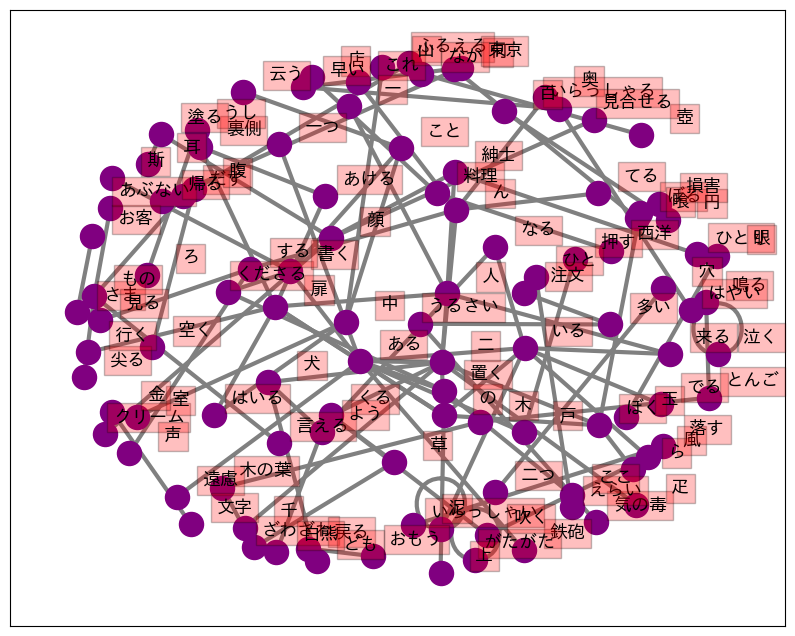

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(G, k=2)
## ネットワークの描画
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels=False,
                 ax=ax)

## 形態素をプロット
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

## 文書単語行列

次に、複数のファイルを読み込んで、それぞれに形態素解析を適用して BoW を作成する方法を説明しましょう。
なお、この文書データは本書のサポートサイト[^ishida_text_mining] からダウンロードできます。

[^ishida_text_mining]:  <https://github.com/IshidaMotohiro/python_de_textMining/tree/master/data>

この3つの文書から次のような表（行列）を作ることを考えます。作業としては、以下のようになります。

1. それぞれ文書へのパスをリストにする
2. フォルダ名を `CountVectorizer()` に渡す



In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import os
## この Path は自分の環境に合わせて変更する必要があります
path = '/home/ishida/my/GitHub/python_de_textmining/data/doc'
files = os.listdir(path)
files = sorted(files)
print(files)
files = [path + '/' + txt_name for txt_name in files]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input = 'filename', tokenizer=my_tokenizer.tokens)
docs = cv.fit_transform(files)
print('3ファイルの頻度表')
print(docs.toarray())
print('形態素ととそのインデックスを確認')
print([ (v, k) for v, k in cv.vocabulary_.items()])

['doc1.txt', 'doc2.txt', 'doc3.txt']
3ファイルの頻度表
[[0 0 1 0 0 1]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]]
形態素ととそのインデックスを確認
[('私', 5), ('学生', 2), ('彼女', 3), ('数学', 4), ('学ぶ', 1), ('いる', 0)]



6 つの要素（頻度）を持つ3つのリストが、1つのリストにまとめられています。これを **文書単語行列** と表現します。
行に文書、そして列に単語を取り、成分が頻度を表した行列です。

|      | いる| 学ぶ | 学生 | 数学 | 私 |
|------|---|-----|-----|---|---|
| doc1 | 0 | 0 | 1 | 0 | 0 | 1 | 
| doc2 | 0 | 0 | 1 | 1 | 1 | 0 |
| doc3 | 1 | 1 | 0 | 1 | 1 | 0 |

行に単語を列に文書をとった場合は **単語文書行列** ということになります。

|      | doc1 | doc2 | doc3 |
|------|------|------|------|
| いる | 0    | 0    | 1    |
| 学ぶ | 0    | 0    | 1    |
| 学生 | 1    | 1    | 0    |
| 数学 | 0    | 1    | 1    |
| 学生 | 0    | 1    | 1    |
| 私   | 1    | 0    | 0    |


### ジェネレータを使って多数のファイルを読み込む方法

やや高度な話題になりますが、分析対象となる文書を指定する方法として、リストではなく、ジェネレータを与えることも可能です。文書のサイズが大きい、あるいは対象の文書数が多い場合は、ジェネレータを利用したほうが実行効率は良くなります（コードは分かりにくくなりますが）。

In [36]:
import os
def file_gen(path):
    files = os.listdir(path)
    for x in files:
        yield(x)
        
files_generator = file_gen(path)

from sklearn.feature_extraction.text import CountVectorizer
## cv = CountVectorizer(files_generator, analyzer=my_tokenizer.tokens)は誤りです
cv = CountVectorizer(analyzer=my_tokenizer.tokens)
docs = cv.fit_transform(files_generator )
docs.toarray()

array([[1, 1, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 1]])


ここでは主に語順を無視して BoW を作成する方法を解説しました。
文書の集合体（コーパス）を対象に、それぞれの文書の内容的な類似度を判別するような分析の場合、語順を無視した BOW データを入力としても、十分な結果が得られることが多いです。